In [1]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
import pickle
import pyidi

%load_ext autoreload
%autoreload 2

Specify the `.cih` file that has the same name as `.mraw` file with images:

In [2]:
filename = 'data/data_showcase.cih'

Make an instance of `pyIDI` class:

In [3]:
video = pyidi.pyIDI(filename)

Information about video can be found in `.info` attribute and images are stored in `.mraw` attribute:

In [4]:
video.info

OrderedDict([('Date', '2018/12/17'),
             ('Camera Type', 'FASTCAM SA-Z type 2100K-M-64GB'),
             ('Record Rate(fps)', '15000'),
             ('Shutter Speed(s)', '1/15371'),
             ('Total Frame', '75'),
             ('Image Width', '640'),
             ('Image Height', '40'),
             ('Color Bit', '8'),
             ('File Format', 'MRaw'),
             ('EffectiveBit Depth', '12')])

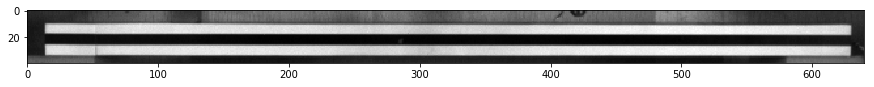

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(video.mraw[0], 'gray')

Points where the displacements will be identified must be determined. Chosen points must have high gradient value.

In [6]:
reference_image = np.average(video.mraw[:10], axis=0)

grad0, grad1 = np.gradient(reference_image)

In [7]:
inds = np.array([[ 26,  20],
               [ 18, 180],
               [ 26, 340],
               [ 26, 500]])

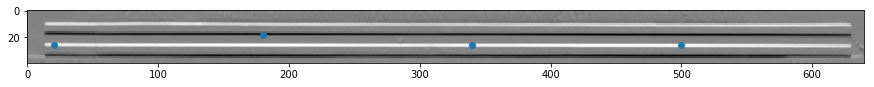

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(grad0, 'gray')
ax.scatter(inds[:, 1], inds[:, 0])

Setting the points and method to be used:

In [9]:
video.set_points(points=inds)
video.set_method('simplified_optical_flow')

If the `points` argument is not given and the `method` is supplied `set_points`, the `get_points` method is triggered.

In [10]:
displacements = video.get_displacements()

100%|█████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 937.76it/s]


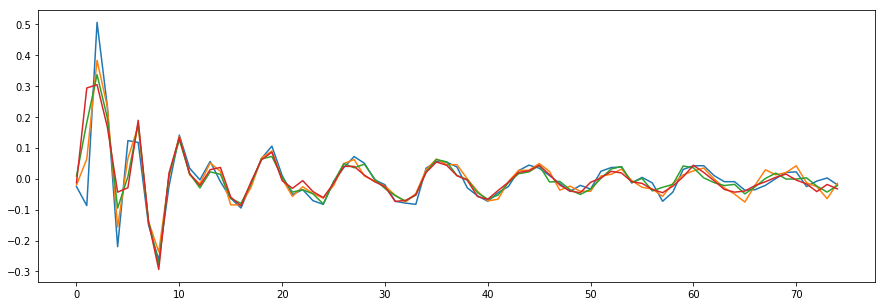

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(displacements[:, :, 0].T);

In [12]:
video.set_method(method='gb')

In [13]:
displacements_1 = video.get_displacements(roi_size=19)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 57.16it/s]


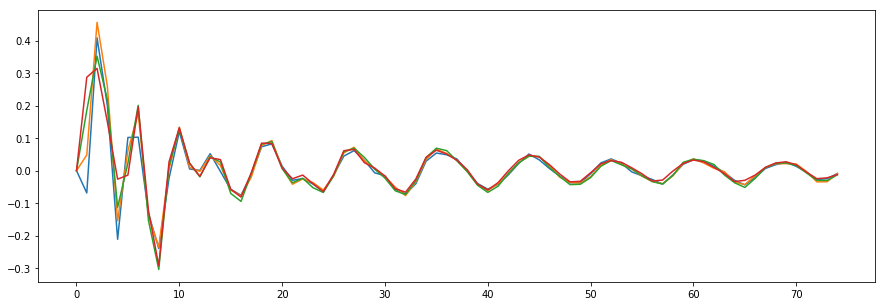

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(displacements_1[:, :, 0].T);

In [15]:
video.close_video()

# Gradient-based

In [16]:
filename_2 = 'data/data_synthetic.cih'
video_2 = pyidi.pyIDI(filename_2)
video_2.info

OrderedDict([('Record Rate(fps)', '1'),
             ('Shutter Speed(s)', '1.000000'),
             ('Total Frame', '101'),
             ('Image Width', '256'),
             ('Image Height', '128'),
             ('Color Bit', '16'),
             ('File Format', 'MRaw'),
             ('EffectiveBit Depth', '12'),
             ('Comment Text',
              'Generated sequence.<br>Modify measurement info in<br>created .cih file if necessary.')])

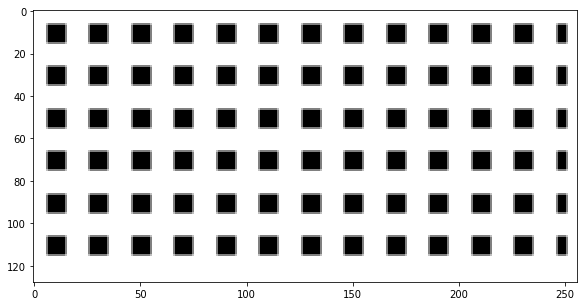

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(video_2.mraw[0], 'gray')

In [18]:
reference_image_2 = np.average(video_2.mraw[:10], axis=0)
grad0_2, grad1_2 = np.gradient(reference_image_2)

In [19]:
inds_2 = np.array([
    [ 31,  35],
    [ 91,  35],
    [ 31, 215],
    [ 91, 215],
    [ 31, 126],
    [ 91, 126],
    [ 66,  71],
    [ 35,  71],
    [ 95,  71],
    [ 66, 191],
    [ 35, 191],
    [ 95, 191]
])

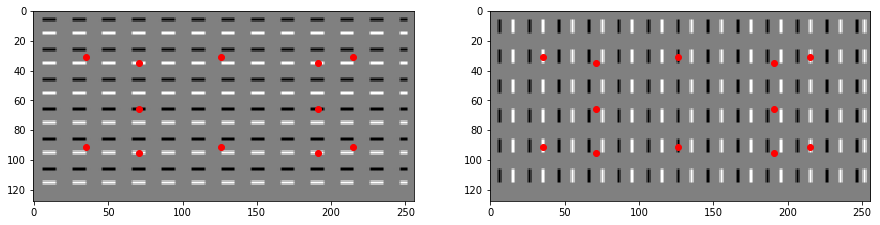

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].imshow(grad0_2, 'gray')
ax[0].scatter(inds_2[:, 1], inds_2[:, 0], c='r')
ax[1].imshow(grad1_2, 'gray')
ax[1].scatter(inds_2[:, 1], inds_2[:, 0], c='r')

In [21]:
generated_t, generated_x, generated_y = np.load('./data/data_synthetic_generated.npy')

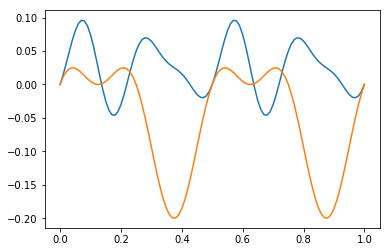

In [22]:
plt.plot(generated_t, generated_x)
plt.plot(generated_t, generated_y)

In [93]:
video_2.set_method('gb')
video_2.set_points(points=inds_2)

For accurate results, make sure at least 2 "speckles" are inside the ROI.

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 60.54it/s]


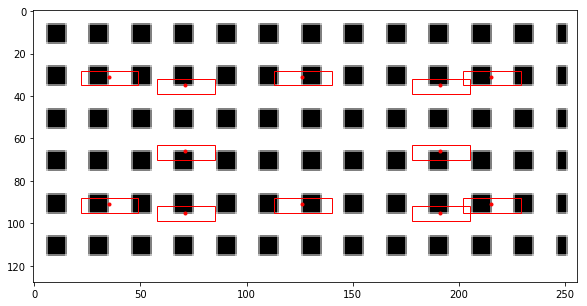

In [110]:
disp_2 = video_2.get_displacements(roi_size=(7, 27))
video_2.show_points()

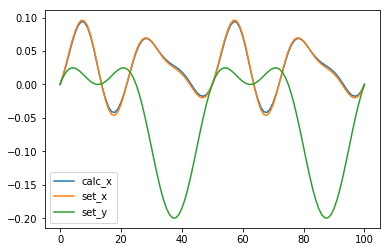

In [112]:
plt.plot(disp_2[0, :, 1] - disp_2[0, 0, 1], label='calc_x')
plt.plot(generated_x, label='set_x')
plt.plot(generated_y, label='set_y')
plt.legend()

In [113]:
video_2.set_method('sof')

In [114]:
disp_2_sof = video_2.get_displacements()

100%|███████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 719.86it/s]


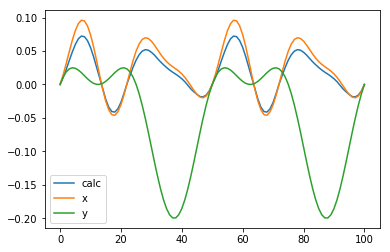

In [115]:
plt.plot(disp_2_sof[0, :, 1] - disp_2_sof[0, 0, 1], label='calc')
plt.plot(generated_x, label='x')
plt.plot(generated_y, label='y')
plt.legend()

In [116]:
video_2.close_video()